LEVEL 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "/content/Dataset .csv"
df = pd.read_csv(url)

Task 1

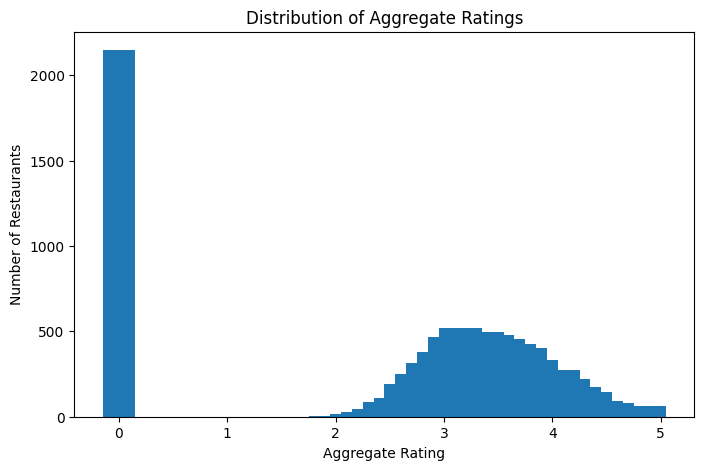

(np.float64(0.0), 2148)

In [ ]:
rating_counts = df['Aggregate rating'].value_counts().sort_index()

# Plot distribution
plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index, rating_counts.values, width=0.3)
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Aggregate Ratings')
plt.show()

# Find most common rating range
most_common_rating = rating_counts.idxmax()
most_common_count = rating_counts.max()

most_common_rating, most_common_count


In [ ]:
# Calculate the average number of votes
average_votes = df['Votes'].mean()
average_votes


np.float64(156.909747670401)

Task 2

In [ ]:
# Identify the most common cuisine combinations
cuisine_combinations = df['Cuisines'].value_counts().head(10)
cuisine_combinations


Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Top 10 Cuisine Combinations by Average Rating:
Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern           4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Sunda, Indonesian                  4.9
Name: Aggregate rating, dtype: float64


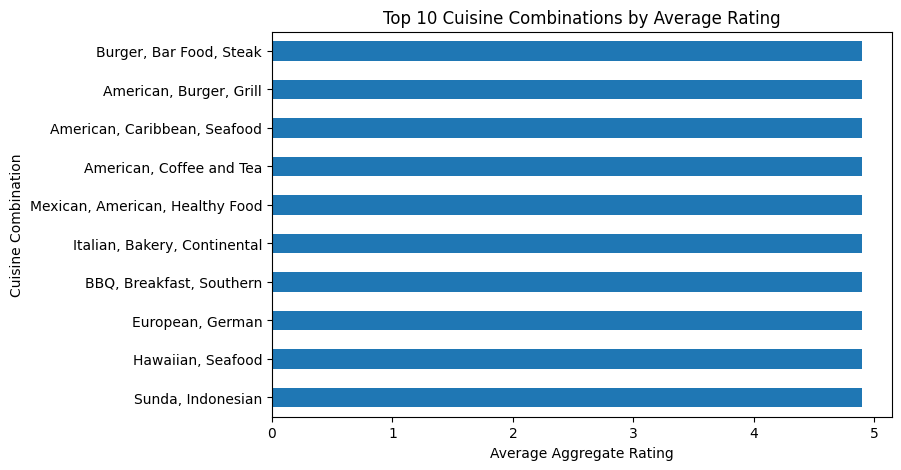

In [ ]:
# Group by 'Cuisines' and calculate mean rating
cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Show top 10 cuisine combinations with highest ratings
print("Top 10 Cuisine Combinations by Average Rating:")
print(cuisine_rating.head(10))

# Optionally, visualize
plt.figure(figsize=(10, 6))

cuisine_rating.head(10).plot(kind='barh', figsize=(8,5))
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Cuisine Combination')
plt.title('Top 10 Cuisine Combinations by Average Rating')
plt.gca().invert_yaxis()
plt.show()


Task 3

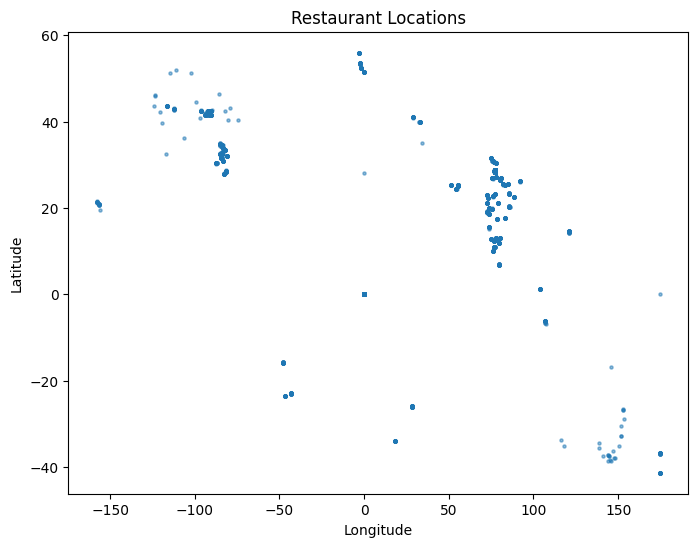

In [19]:
# Plot locations
plt.figure(figsize=(8, 6))
plt.scatter(df['Longitude'], df['Latitude'], s=5, alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Restaurant Locations")
plt.show()


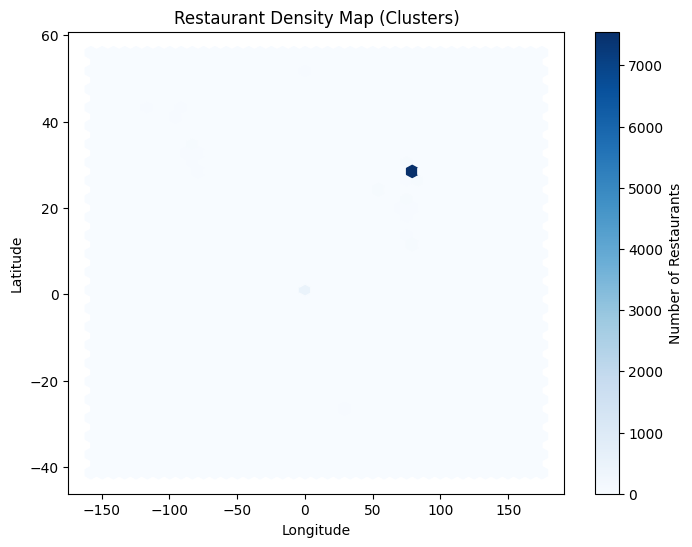

In [ ]:
# Use hexbin to see dense areas
plt.figure(figsize=(8, 6))
plt.hexbin(df['Longitude'], df['Latitude'], gridsize=40, cmap='Blues')
plt.colorbar(label="Number of Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Restaurant Density Map (Clusters)")
plt.show()


Task 4

In [16]:
# Count occurrences of each restaurant name
chain_counts = df['Restaurant Name'].value_counts()

# Filter to keep only those that appear more than once (chains)
restaurant_chains = chain_counts[chain_counts > 1]

print("Number of restaurant chains found:", len(restaurant_chains))
print("\nTop 10 restaurant chains:")
print(restaurant_chains.head(10))


Number of restaurant chains found: 734

Top 10 restaurant chains:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


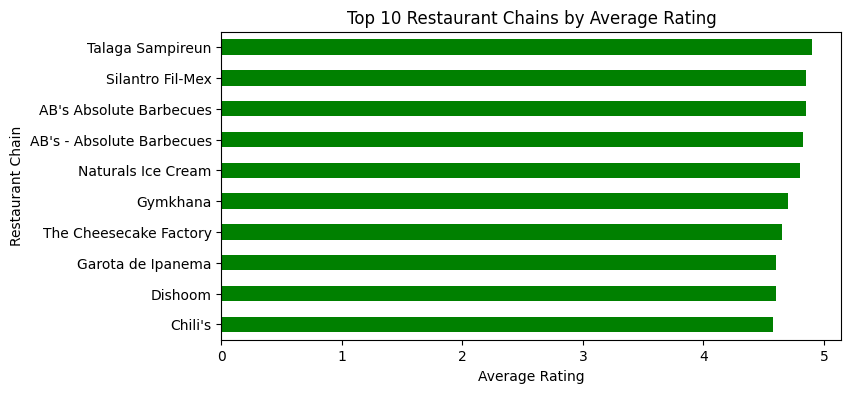

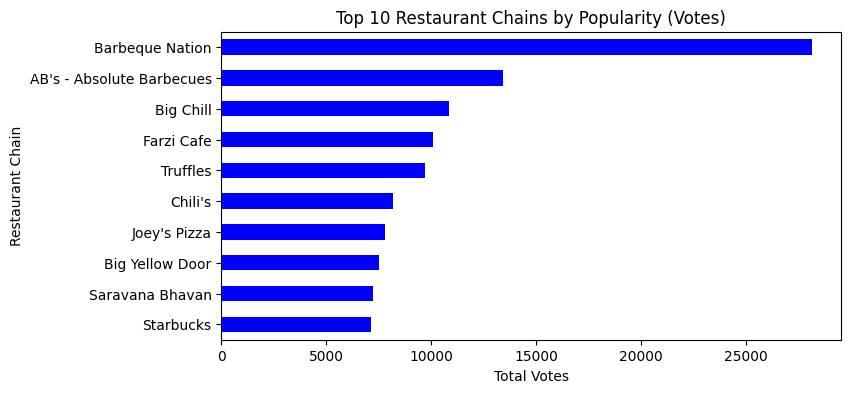

In [18]:
# Group by restaurant name to calculate stats
chain_stats = df.groupby('Restaurant Name').agg(
    Locations=('Restaurant ID', 'count'),
    Avg_Rating=('Aggregate rating', 'mean'),
    Total_Votes=('Votes', 'sum')
)

# Keep only restaurant chains (more than 1 location)
chain_stats = chain_stats[chain_stats['Locations'] > 1]

# --- Top Chains by Average Rating ---
top_chains_by_rating = chain_stats.sort_values(by='Avg_Rating', ascending=False).head(10)

# --- Top Chains by Popularity (Votes) ---
top_chains_by_votes = chain_stats.sort_values(by='Total_Votes', ascending=False).head(10)

# Plot Top 10 by Rating
plt.figure(figsize=(8, 4))
top_chains_by_rating['Avg_Rating'].plot(kind='barh', color='green')
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Chain")
plt.title("Top 10 Restaurant Chains by Average Rating")
plt.gca().invert_yaxis()
plt.show()

# Plot Top 10 by Popularity
plt.figure(figsize=(8, 4))
top_chains_by_votes['Total_Votes'].plot(kind='barh', color='blue')
plt.xlabel("Total Votes")
plt.ylabel("Restaurant Chain")
plt.title("Top 10 Restaurant Chains by Popularity (Votes)")
plt.gca().invert_yaxis()
plt.show()



